In [171]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn import tree

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [173]:
import pandas as pd

In [174]:
df=pd.read_excel('//content//drive//My Drive//A_Om Kant Sharma//Suicide_Detection.xlsx') ##,encoding='latin1'
df.head(5)

,Unnamed: 0,text,class,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Am I weird I don't get affected by compliments...,non-suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,i need helpjust help me im crying so hard,suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,"Iâ€™m so lostHello, my name is Adam (16) and I...",suicide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df.shape

(233337, 87)

In [176]:
df.isnull().sum()

Unnamed: 0         92
text             1191
class            1250
Unnamed: 3     233301
Unnamed: 4     233308
                ...  
Unnamed: 82    233335
Unnamed: 83    233335
Unnamed: 84    233335
Unnamed: 85    233335
Unnamed: 86    233336
Length: 87, dtype: int64

In [177]:
df=df.iloc[:,1:3]  

In [178]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [179]:
print(type(df['text']))

<class 'pandas.core.series.Series'>


In [180]:
print(type(df['class']))

<class 'pandas.core.series.Series'>


In [181]:
df.isnull().sum()

text     1191
class    1250
dtype: int64

In [182]:
r=df.dropna(how='any')
r.head((100))

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâ€™m so lostHello, my name is Adam (16) and I...",suicide
...,...,...
95,day 3 of posting something i get mildly infuri...,non-suicide
96,A lot of stuff to handle at once for me \nSorr...,non-suicide
97,I'm going to wait for a version of senorita In...,non-suicide
98,You know I just realized you cant have an opin...,non-suicide


In [183]:
r.isnull().sum()

text     0
class    0
dtype: int64

In [184]:
df=r

In [185]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [186]:
df.nunique()

text     232080
class        42
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232082 entries, 0 to 233336
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232082 non-null  object
 1   class   232082 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [188]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâ€™m so lostHello, my name is Adam (16) and I...",suicide
...,...,...
233332,If you don't like rock then your not going to ...,non-suicide
233333,You how you can tell i have so many friends an...,non-suicide
233334,pee probably tastes like salty teaðŸ˜ðŸ’¦â€¼ï...,non-suicide
233335,The usual stuff you find hereI'm not posting t...,suicide


In [189]:
type(df['text'])
df['text'].value_counts()

 that he came                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [190]:
print(type(df['class']))
df['class'].value_counts()

<class 'pandas.core.series.Series'>


suicide                                                                                                                                                                                                                                                                                                                                                       116030
non-suicide                                                                                                                                                                                                                                                                                                                                                   116010
  which  is  in  thewilderness.7And they returned                                                                                                                                                                                                                                             

In [191]:
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)
#pd.reset_option('display.max_columns', None)
#pd.reset_option("max_rows", None)


In [192]:
df['class']

0             suicide
1         non-suicide
2         non-suicide
3             suicide
4             suicide
             ...     
233332    non-suicide
233333    non-suicide
233334    non-suicide
233335        suicide
233336    non-suicide
Name: class, Length: 232082, dtype: object

In [193]:
df['class'].unique()

array(['suicide', 'non-suicide',
       ' but i could die at least! I crossed a bridge across the motorway. We had passed under it in a car so many times. I had seen on another bridge earlier that tyou could get tyour feet onto a surface ont he ohter sidef. I went to the side',
       " but its making me feel worse. A few people were pleaesd to see me back. It touched me in a way. I'm sure im not alone when i say suicidal people have contemplated who would be at their funerals. I'm sick of living this life. Seeing other people livign their life",
       ' with our intelligence and our knowledge of the cosmos."',
       ' what are you doing?! Then all we do is blend in with traffic... ...without arousing suspicion. Once at the airport',
       ' my father used to yell', ' let alone saying it', ' her siblings',
       ' understandable.  Itâ€™s 10 pages single spaced after all.  Iâ€™m probably going to print this out later to take to my schoolâ€™s counselling center because itâ€™s easier 

In [194]:
a=df[(df['class']=='non-suicide')]
a.shape

(116010, 2)

In [195]:
b=df[(df['class']=='suicide')]
b.shape

(116030, 2)

In [196]:
df = a.append(b)
df

,text,class
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
15,Fuck the verizon smart family app I canâ€™t ev...,non-suicide
17,"Well, Im screwed. I locked myself in the schoo...",non-suicide
...,...,...
233324,Iâ€™ve fucking had enough.None of this depress...,suicide
233325,paralyzing anxiety &amp; depression are pushin...,suicide
233329,My mom tried to kill herself today. I feel los...,suicide
233330,Iâ€™m a fucking scummy person and I canâ€™t ch...,suicide


In [197]:
Category_count=df.groupby(['class']).count()
Category_count

,text
class,
non-suicide,116010
suicide,116030


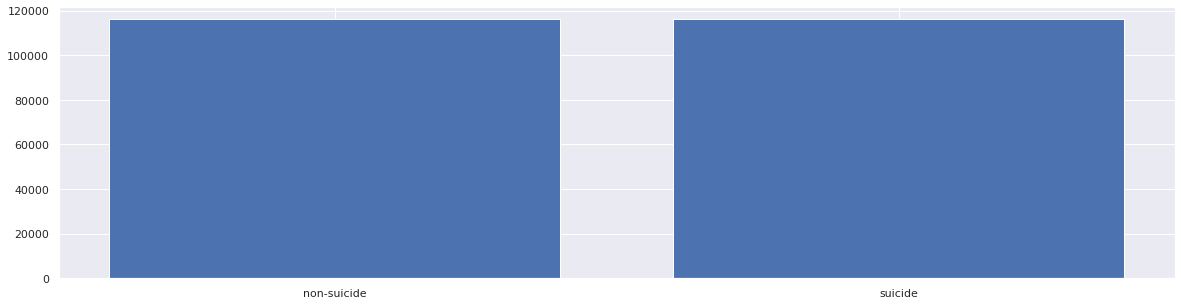

In [198]:
#r=df
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
Category_count=df.groupby('class').count()
plt.bar(Category_count.index.values, Category_count['text'])
plt.show()

In [199]:
Category_count['text']

class
non-suicide    116010
suicide        116030
Name: text, dtype: int64

In [200]:
df['class']

1         non-suicide
2         non-suicide
8         non-suicide
15        non-suicide
17        non-suicide
             ...     
233324        suicide
233325        suicide
233329        suicide
233330        suicide
233335        suicide
Name: class, Length: 232040, dtype: object

In [201]:
print(df['text'].shape)
print(df['class'].shape)
print(df.shape)

(232040,)
(232040,)
(232040, 2)


In [202]:
df.head(100)

,text,class
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
15,Fuck the verizon smart family app I canâ€™t ev...,non-suicide
17,"Well, Im screwed. I locked myself in the schoo...",non-suicide
...,...,...
188,Is there a cure for intense boredom? Other LSD...,non-suicide
191,Does anyone else feel like they were neglected...,non-suicide
192,"Aight thats it, time to go I've been up for to...",non-suicide
199,"Welp, here we go again. Hey hey! Guess who got...",non-suicide


In [203]:
df.nunique()

text     232040
class         2
dtype: int64

In [204]:
X=df.iloc[:,:1]
y=df.iloc[:,1]
X

,text
1,Am I weird I don't get affected by compliments...
2,Finally 2020 is almost over... So I can never ...
8,"Everyone wants to be ""edgy"" and it's making me..."
15,Fuck the verizon smart family app I canâ€™t ev...
17,"Well, Im screwed. I locked myself in the schoo..."
...,...
233324,Iâ€™ve fucking had enough.None of this depress...
233325,paralyzing anxiety &amp; depression are pushin...
233329,My mom tried to kill herself today. I feel los...
233330,Iâ€™m a fucking scummy person and I canâ€™t ch...


In [205]:
y

1         non-suicide
2         non-suicide
8         non-suicide
15        non-suicide
17        non-suicide
             ...     
233324        suicide
233325        suicide
233329        suicide
233330        suicide
233335        suicide
Name: class, Length: 232040, dtype: object

## [CountVectorizer]
## Artificial Neural Network (ANN)

In [206]:
df.shape

(232040, 2)

In [207]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer = token.tokenize)
X = cv.fit_transform(df['text'])
X

<232040x158998 sparse matrix of type '<class 'numpy.int64'>'
	with 10139319 stored elements in Compressed Sparse Row format>

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(185632, 158998)
(46408, 158998)
(185632,)
(46408,)


In [210]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [212]:
model = Sequential()
model.add(Dense(units=16,activation='relu', input_shape=(158998,))) 
model.add(Dropout(0.1))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20,batch_size=10000, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


19/19 [==============================] - 4s 142ms/step - loss: 0.5251 - accuracy: 0.7459 - val_loss: 0.3664 - val_accuracy: 0.8916
Epoch 2/20
19/19 [==============================] - 3s 139ms/step - loss: 0.2679 - accuracy: 0.9248 - val_loss: 0.3116 - val_accuracy: 0.9061
Epoch 3/20
19/19 [==============================] - 3s 135ms/step - loss: 0.1819 - accuracy: 0.9553 - val_loss: 0.3160 - val_accuracy: 0.9081
Epoch 4/20
19/19 [==============================] - 3s 137ms/step - loss: 0.1214 - accuracy: 0.9664 - val_loss: 0.3363 - val_accuracy: 0.9090
Epoch 5/20
19/19 [==============================] - 3s 137ms/step - loss: 0.0969 - accuracy: 0.9725 - val_loss: 0.3610 - val_accuracy: 0.9088
Epoch 6/20
19/19 [==============================] - 3s 133ms/step - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.3874 - val_accuracy: 0.9080
Epoch 7/20
19/19 [==============================] - 3s 133ms/step - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.4078 - val_accuracy: 0.9074
Epoch 8/20
19/19 

In [ ]:
y_pred_m1 = model.predict(X_test)
y_pred_m1

array([[1.0084851e-08],
       [1.4418364e-04],
       [9.9999875e-01],
       ...,
       [2.0453334e-04],
       [8.3831215e-01],
       [9.9962175e-01]], dtype=float32)

In [ ]:
y_pred_m1_cls = (model.predict(X_test) > 0.5).astype("int32")
y_pred_m1_cls

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:

loss,acc = model.evaluate(X_test,y_test)
print('Loss',loss)
print('Accuracy',acc)

1451/1451 [==============================] - 2s 1ms/step - loss: 0.7122 - accuracy: 0.9042
Loss 0.7121525406837463
Accuracy 0.9041544795036316


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21122  2015]
 [ 2433 20838]]


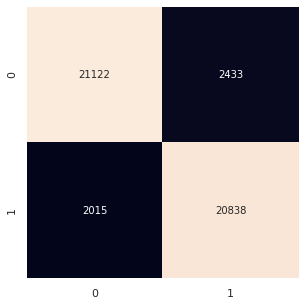

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

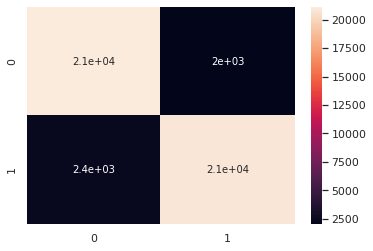

In [ ]:
import seaborn as sns
sns.heatmap(lr, annot=True)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9041544561282537


In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Loss is',loss)
print('Accuracy is',acc)

1451/1451 [==============================] - 2s 1ms/step - loss: 0.7122 - accuracy: 0.9042
Loss is 0.7121525406837463
Accuracy is 0.9041544795036316


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     23137
           1       0.91      0.90      0.90     23271

    accuracy                           0.90     46408
   macro avg       0.90      0.90      0.90     46408
weighted avg       0.90      0.90      0.90     46408



## [TfidfVectorizer] Term Frequency-Inverse Document Frequency
#### 1. Multinomial Naive Bayes, 2. Logistic Regression, 3. Random Forest Classifier, 4. Decision Tree, 

In [213]:
df.shape

(232040, 2)

In [214]:
r=df
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(r['text'])
X

<232040x177644 sparse matrix of type '<class 'numpy.float64'>'
	with 16527477 stored elements in Compressed Sparse Row format>

In [215]:
y=df['class']
y

1         non-suicide
2         non-suicide
8         non-suicide
15        non-suicide
17        non-suicide
             ...     
233324        suicide
233325        suicide
233329        suicide
233330        suicide
233335        suicide
Name: class, Length: 232040, dtype: object

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [217]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(185632, 177644)
(46408, 177644)
(185632,)
(46408,)


In [218]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1. Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(x_train,y_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(x_train,y_train)

0.8901213152904671

In [ ]:
nb.score(x_test,y_test)

0.8800637821065334

In [ ]:
y_pred_nb= nb.predict(x_test)
print(len(y_pred_nb))
y_pred_nb

46408


array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
       'suicide'], dtype='<U11')

In [ ]:
metrics.accuracy_score(y_test,y_pred_nb)

0.8800637821065334

In [ ]:
print(confusion_matrix (y_test,y_pred_nb))

[[18202  4972]
 [  594 22640]]


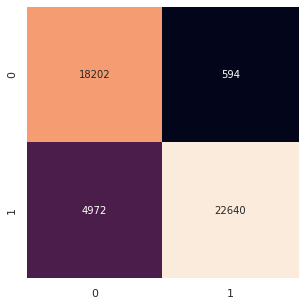

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
nb_df=pd.DataFrame({'y_test':y_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,y_test,y_pred_nb
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:
nb_df.groupby(['y_test','y_pred_nb'])['y_pred_nb'].count()  

y_test       y_pred_nb  
non-suicide  non-suicide    18202
             suicide         4972
suicide      non-suicide      594
             suicide        22640
Name: y_pred_nb, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_nb))

              precision    recall  f1-score   support

 non-suicide       0.97      0.79      0.87     23174
     suicide       0.82      0.97      0.89     23234

    accuracy                           0.88     46408
   macro avg       0.89      0.88      0.88     46408
weighted avg       0.89      0.88      0.88     46408



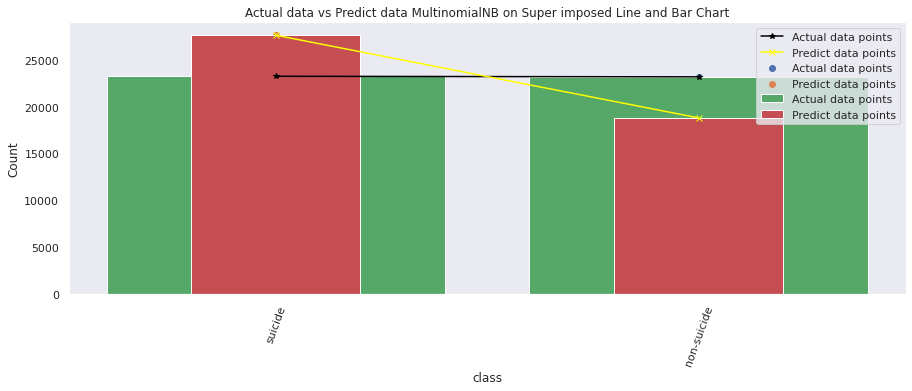

In [ ]:
actual_nb=nb_df['y_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data MultinomialNB on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test,y_pred_nb))

MultinomialNB Accuracy: 0.8800637821065334


### 2. Classification (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_train,y_train)

0.9456666953973453

In [ ]:
lr.score(x_test,y_test)

0.9391268746767799

In [ ]:
y_pred_lr = lr.predict(x_test)
len(y_pred_lr),y_pred_lr

(46408,
 array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'non-suicide',
        'suicide'], dtype=object))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[22021,  1153],
       [ 1675, 21559]])

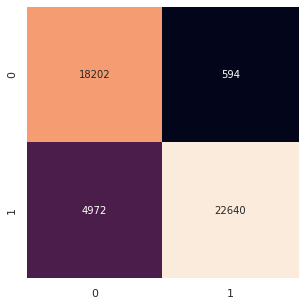

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
lr_df=pd.DataFrame({'y_test':y_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,y_test,y_pred_lr
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:
lr_df.groupby(['y_test','y_pred_lr'])['y_pred_lr'].count()

y_test       y_pred_lr  
non-suicide  non-suicide    22023
             suicide         1151
suicide      non-suicide     1674
             suicide        21560
Name: y_pred_lr, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_lr))

              precision    recall  f1-score   support

 non-suicide       0.93      0.95      0.94     23174
     suicide       0.95      0.93      0.94     23234

    accuracy                           0.94     46408
   macro avg       0.94      0.94      0.94     46408
weighted avg       0.94      0.94      0.94     46408



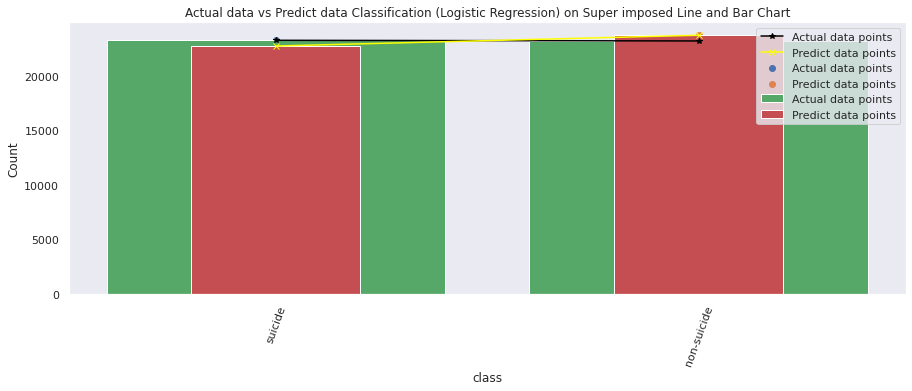

In [ ]:
actual_nb=lr_df['y_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Classification (Logistic Regression) on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(y_test,y_pred_lr)

0.9391268746767799

### 3. Random  Forest  Classifier  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(x_test,y_test)

0.7541587657300466

In [ ]:
rfc.score(x_train,y_train)

0.7550583951042924

In [ ]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array(['non-suicide', 'suicide', 'suicide', ..., 'non-suicide',
       'non-suicide', 'suicide'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_pred_rfc)

0.7541587657300466

In [ ]:
confusion_matrix(y_test,y_pred_rfc)

array([[19315,  3859],
       [ 7550, 15684]])

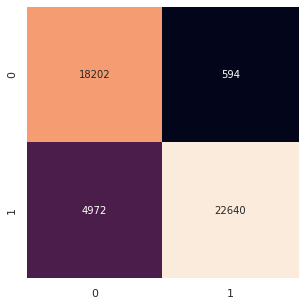

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
rfc_df=pd.DataFrame({'y_test':y_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,y_test,y_pred_rfc
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:
rfc_df.groupby(['y_test','y_pred_rfc'])['y_pred_rfc'].count()

y_test       y_pred_rfc 
non-suicide  non-suicide    19315
             suicide         3859
suicide      non-suicide     7550
             suicide        15684
Name: y_pred_rfc, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

 non-suicide       0.72      0.83      0.77     23174
     suicide       0.80      0.68      0.73     23234

    accuracy                           0.75     46408
   macro avg       0.76      0.75      0.75     46408
weighted avg       0.76      0.75      0.75     46408



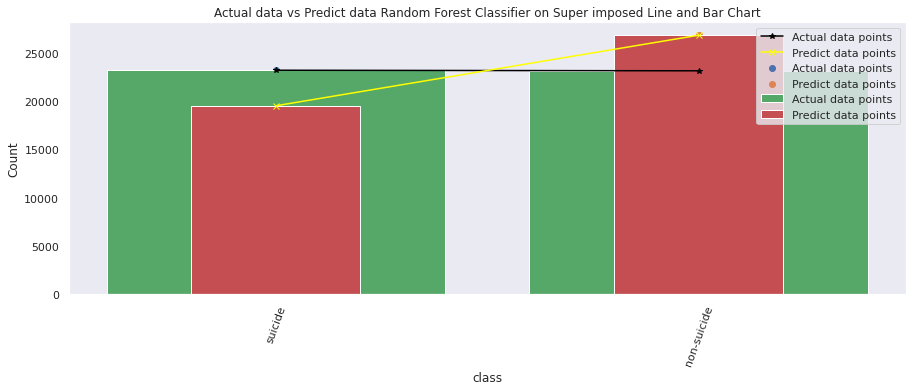

In [ ]:
actual_nb=rfc_df['y_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(y_test,y_pred_rfc)

0.7541587657300466

### 4. Decision Tree


In [219]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [221]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.999973064988795
0.8550465436993622


In [222]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
       'suicide'], dtype=object)

In [223]:
confusion_matrix(y_test,y_pred_dt)

array([[19902,  3272],
       [ 3455, 19779]])

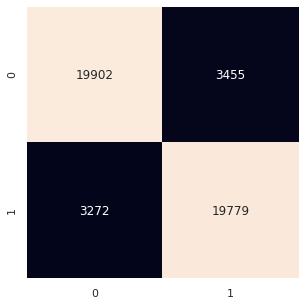

In [225]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [226]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

 non-suicide       0.85      0.86      0.86     23174
     suicide       0.86      0.85      0.85     23234

    accuracy                           0.86     46408
   macro avg       0.86      0.86      0.86     46408
weighted avg       0.86      0.86      0.86     46408



In [227]:
dt_df=pd.DataFrame({'y_test':y_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,y_test,y_pred_dt
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [228]:
dt_df.groupby(['y_test','y_pred_dt'])['y_pred_dt'].count()

y_test       y_pred_dt  
non-suicide  non-suicide    19902
             suicide         3272
suicide      non-suicide     3455
             suicide        19779
Name: y_pred_dt, dtype: int64

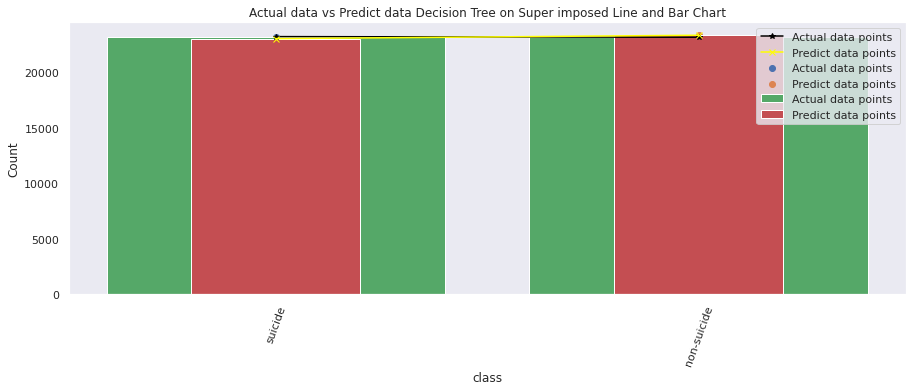

In [229]:
actual_nb=dt_df['y_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [230]:
print(accuracy_score(y_test,y_pred_dt))

0.8550465436993622


# CountVectorizer 

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer = token.tokenize)
X = cv.fit_transform(df['text'])
X

<232040x158998 sparse matrix of type '<class 'numpy.int64'>'
	with 10139319 stored elements in Compressed Sparse Row format>

In [232]:
df.head(2)

,text,class
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide


In [233]:
y=df['class']

In [234]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(X,y, test_size=0.3, random_state=123)

### 1. Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(xx_train,yy_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(xx_train,yy_train)

0.9022274484694757

In [ ]:
nb.score(xx_test,yy_test)

0.8951473883813136

In [ ]:
y_pred_nb= nb.predict(xx_test)
print(len(y_pred_nb))
y_pred_nb

69612


array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
       'suicide'], dtype='<U11')

In [ ]:
metrics.accuracy_score(yy_test,y_pred_nb)

0.8951473883813136

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
print(confusion_matrix (yy_test,y_pred_nb))

[[28953  5896]
 [ 1403 33360]]


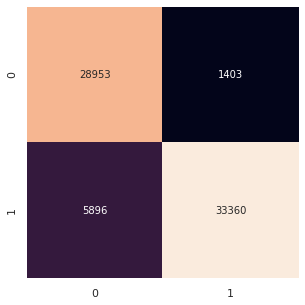

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
nb_df=pd.DataFrame({'yy_test':yy_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,yy_test,y_pred_nb
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:
nb_df.groupby(['yy_test','y_pred_nb'])['y_pred_nb'].count()   # difference between actual and Predicted

yy_test      y_pred_nb  
non-suicide  non-suicide    28953
             suicide         5896
suicide      non-suicide     1403
             suicide        33360
Name: y_pred_nb, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_nb))

              precision    recall  f1-score   support

 non-suicide       0.95      0.83      0.89     34849
     suicide       0.85      0.96      0.90     34763

    accuracy                           0.90     69612
   macro avg       0.90      0.90      0.89     69612
weighted avg       0.90      0.90      0.89     69612



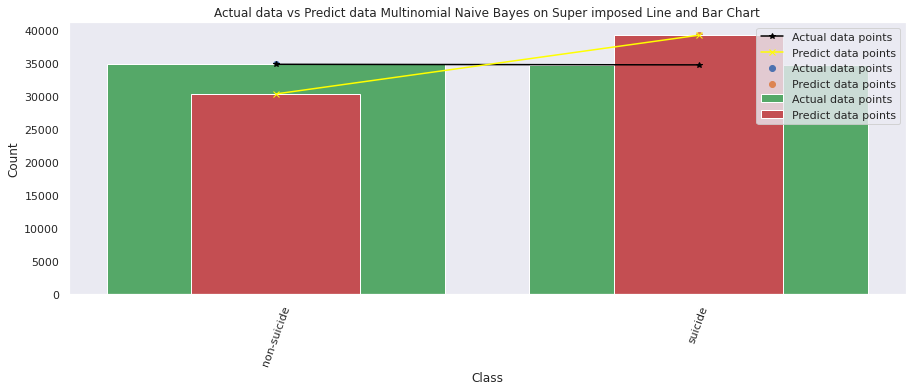

In [ ]:
actual_nb=nb_df['yy_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Multinomial Naive Bayes on Super imposed Line and Bar Chart")
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(yy_test,y_pred_nb))

MultinomialNB Accuracy: 0.8951473883813136


### 2. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(xx_train,yy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(xx_train,yy_train)

0.9492267343068929

In [ ]:
lr.score(xx_test,yy_test)

0.930155720278113

In [ ]:
y_pred_lr = lr.predict(xx_test)
len(y_pred_lr),y_pred_lr

(69612, array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
        'suicide'], dtype=object))

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.930155720278113

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yy_test,y_pred_lr)

array([[33139,  1710],
       [ 3152, 31611]])

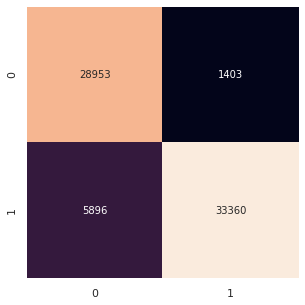

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
lr_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,yy_test,y_pred_lr
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:

lr_df.groupby(['yy_test','y_pred_lr'])['y_pred_lr'].count()

yy_test      y_pred_lr  
non-suicide  non-suicide    33139
             suicide         1710
suicide      non-suicide     3152
             suicide        31611
Name: y_pred_lr, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_lr))

              precision    recall  f1-score   support

 non-suicide       0.91      0.95      0.93     34849
     suicide       0.95      0.91      0.93     34763

    accuracy                           0.93     69612
   macro avg       0.93      0.93      0.93     69612
weighted avg       0.93      0.93      0.93     69612



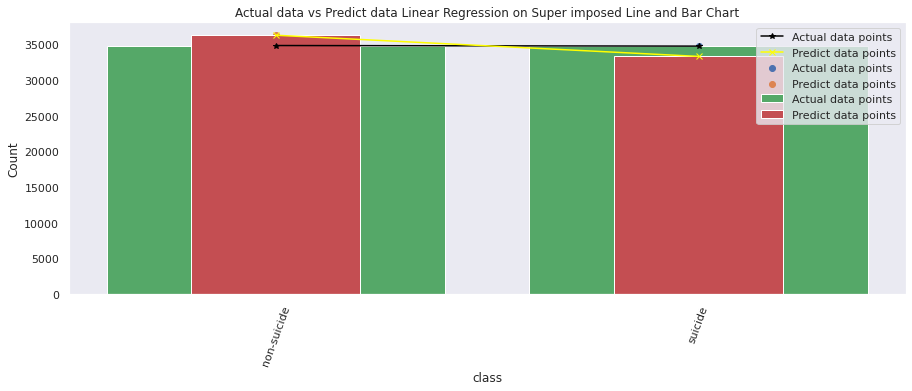

In [ ]:
actual_nb=lr_df['yy_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Linear Regression on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.930155720278113

### 3. Random  Forest  Classifier  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [ ]:
rfc.fit(xx_train,yy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(xx_test,yy_test)

0.7547405619720737

In [ ]:
rfc.score(xx_train,yy_train)

0.7555286034427562

In [ ]:
y_pred_rfc = rfc.predict(xx_test)
y_pred_rfc

array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
       'suicide'], dtype=object)

In [ ]:
confusion_matrix(yy_test,y_pred_rfc)

array([[30935,  3914],
       [13159, 21604]])

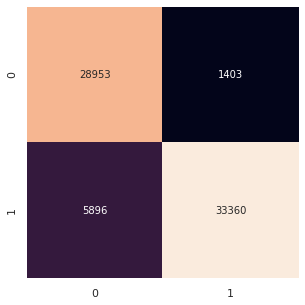

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
rfc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,yy_test,y_pred_rfc
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [ ]:
rfc_df.groupby(['yy_test','y_pred_rfc'])['y_pred_rfc'].count()

yy_test      y_pred_rfc 
non-suicide  non-suicide    30935
             suicide         3914
suicide      non-suicide    13159
             suicide        21604
Name: y_pred_rfc, dtype: int64

In [ ]:
print(classification_report(yy_test,y_pred_rfc))

              precision    recall  f1-score   support

 non-suicide       0.70      0.89      0.78     34849
     suicide       0.85      0.62      0.72     34763

    accuracy                           0.75     69612
   macro avg       0.77      0.75      0.75     69612
weighted avg       0.77      0.75      0.75     69612



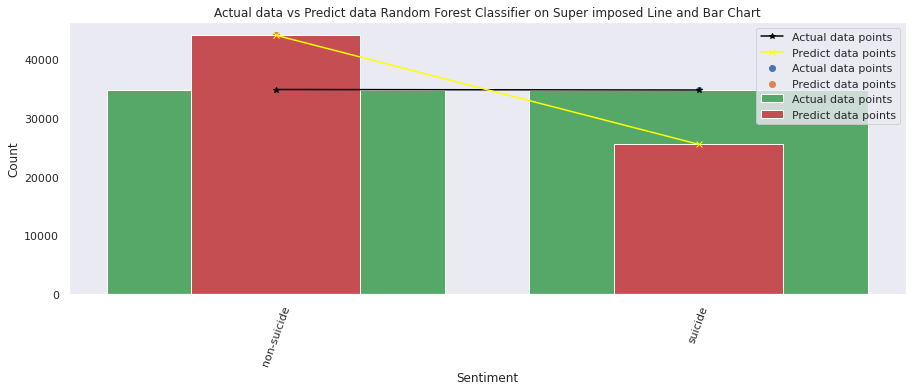

In [ ]:
actual_nb=rfc_df['yy_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_rfc)

0.7547405619720737

### 4. Decision Tree

In [237]:
from sklearn import tree

In [239]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xx_train,yy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [240]:
print(dt.score(xx_train,yy_train))
print(dt.score(xx_test,yy_test))

0.9999014948161647
0.8535310004022295


In [241]:
y_pred_dt = dt.predict(xx_test)
y_pred_dt

array(['non-suicide', 'suicide', 'suicide', ..., 'suicide', 'suicide',
       'suicide'], dtype=object)

In [242]:
confusion_matrix(yy_test,y_pred_dt)

array([[29701,  5148],
       [ 5048, 29715]])

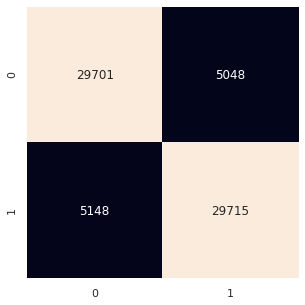

In [244]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(yy_test,y_pred_dt)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [245]:
dt_df=pd.DataFrame({'yy_test':yy_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,yy_test,y_pred_dt
44097,non-suicide,non-suicide
189006,suicide,suicide
198397,suicide,suicide
55658,non-suicide,non-suicide
52875,suicide,suicide


In [246]:
dt_df.groupby(['yy_test','y_pred_dt'])['y_pred_dt'].count()

yy_test      y_pred_dt  
non-suicide  non-suicide    29701
             suicide         5148
suicide      non-suicide     5048
             suicide        29715
Name: y_pred_dt, dtype: int64

In [247]:
print(classification_report(yy_test,y_pred_dt))

              precision    recall  f1-score   support

 non-suicide       0.85      0.85      0.85     34849
     suicide       0.85      0.85      0.85     34763

    accuracy                           0.85     69612
   macro avg       0.85      0.85      0.85     69612
weighted avg       0.85      0.85      0.85     69612



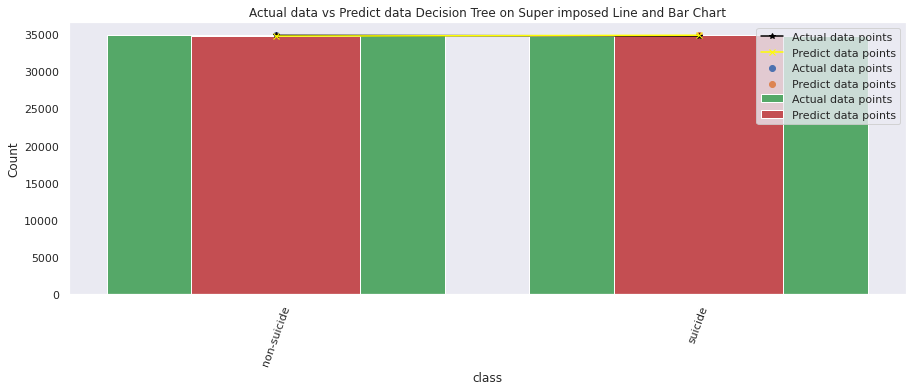

In [248]:
actual_nb=dt_df['yy_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [249]:
print(accuracy_score(yy_test,y_pred_dt))

0.8535310004022295
